In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


# Stroke Preduction Model
``Here in this model you will be analyse stroke prediction ``

# Contents
<ul>
    <li>Import and first glance  </li>
<li>Data Cleansing   </li>
<li>Numerical Features  </ li>
<li>Categorical Features  </li>
<li>Target  </li>
<li>Build Model </li>
<li>Evaluate on Training Data </li>
<li>Evaluate on Test Set </li>

<img src='https://media3.giphy.com/media/xT5LMBk9CIQXji0wNy/giphy.gif'>

# Packages

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

# Reading the file

In [3]:
df=pd.read_csv("../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

``Checking the shape of dataset``

In [4]:
#to check shape
df.shape


(5110, 12)

``Contains 5110 rows and 12 columns``

In [5]:
#colums
print(df.columns.tolist())

['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


# Cleaning of data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:


#it contains total of 12 columns

In [8]:
df.bmi.isnull().value_counts()


False    4909
True      201
Name: bmi, dtype: int64

``It states that it has 201 null values``

In [9]:
df.bmi=df.bmi.fillna(-99)

``Filling out the null value``

In [10]:
#here make a target variable so that we can use easily
df["target"]=df.stroke
df=df.drop(["stroke"],axis=1) #removing stroke from here

In [11]:
df.target

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: target, Length: 5110, dtype: int64

# Data Processing

# Taking main features of the dataset

In [12]:
features=["age","avg_glucose_level","bmi"] #selecting the parameters that we use

In [13]:
df[features].describe(percentiles=[0.1,0.2,0.3,0.4])

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000
mean,43.226614,106.147677,23.862603
std,22.612647,45.283560,26.028009
min,0.080000,55.120000,-99.000000
10%,11.000000,65.789000,18.290000
20%,20.000000,73.760000,21.600000
30%,30.000000,80.038000,24.000000
40%,38.000000,85.600000,26.000000
50%,45.000000,91.885000,27.700000
max,82.000000,271.740000,97.600000


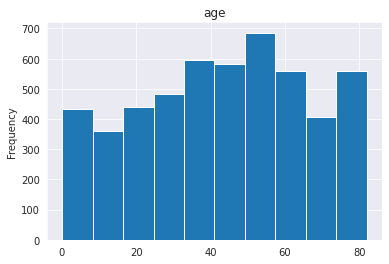

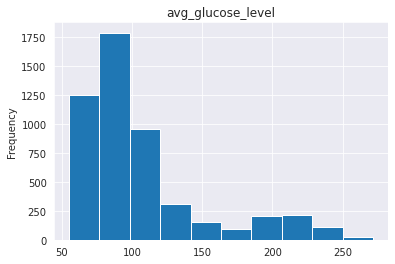

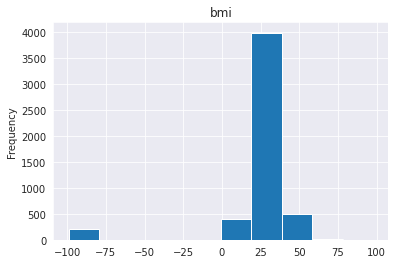

In [14]:
#plotting graph

for f in features:
    df[f].plot(kind="hist")
    plt.title(f)
    plt.show()

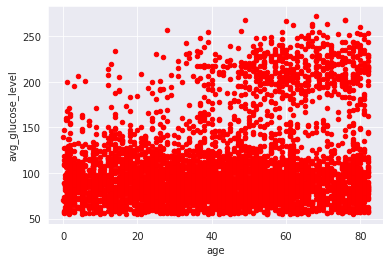

In [15]:
df.plot(kind='scatter',x='age',y='avg_glucose_level',color='red')
plt.show()


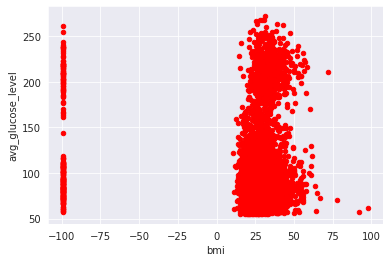

In [16]:
df.plot(kind='scatter',x='bmi',y='avg_glucose_level',color='red')
plt.show()


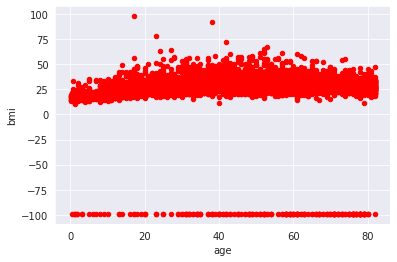

In [17]:
df.plot(kind='scatter',x='age',y='bmi',color='red')
plt.show()


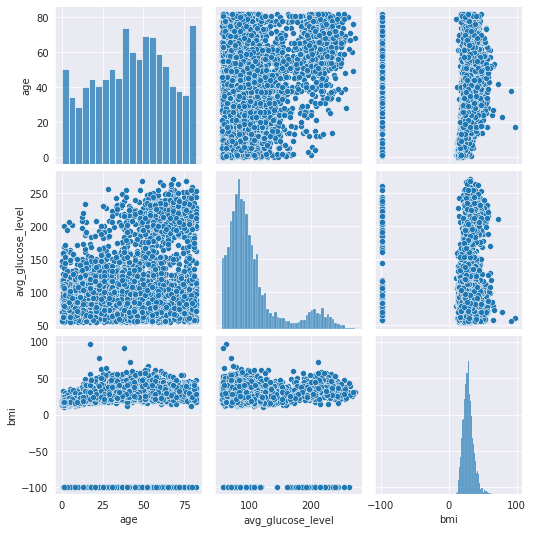

In [18]:
sns.pairplot(df[features])


In [19]:
spearman=df[features].corr(method="spearman")
fig=plt.figure(figsize=(7,5))
plt.show()

<Figure size 504x360 with 0 Axes>

# Categorial features

In [20]:
features_cat=['gender','hypertension','heart_disease','ever_married',
                'work_type','Residence_type','smoking_status']

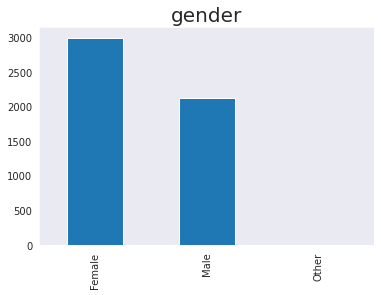

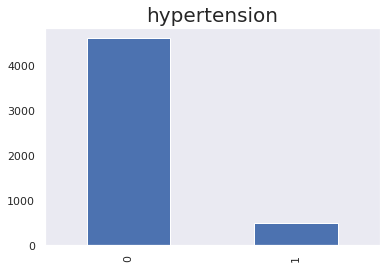

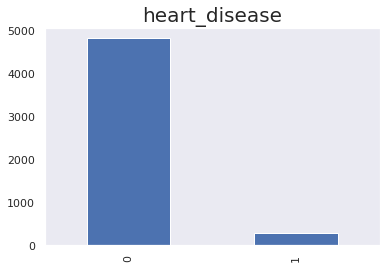

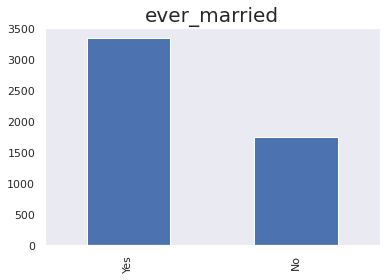

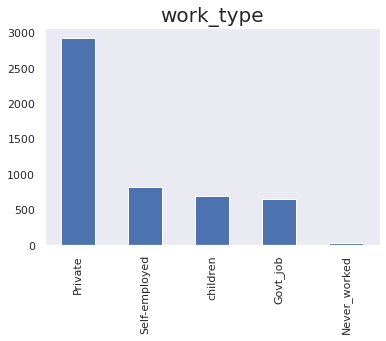

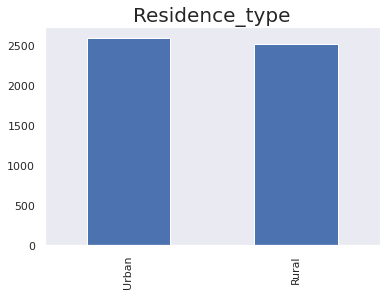

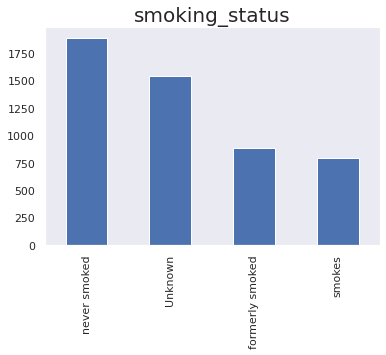

In [21]:
for f in features_cat:
    df[f].value_counts().plot(kind='bar')
    plt.title(f,size=20)
    plt.grid()
    sns.set_theme(style='darkgrid')
    plt.show()

In [22]:
target_count=df.target.value_counts()
print(target_count)
print("Percentage of stroke[1]",np.round(100*target_count[1]/target_count.sum(),2),"%")

0    4861
1     249
Name: target, dtype: int64
Percentage of stroke[1] 4.87 %


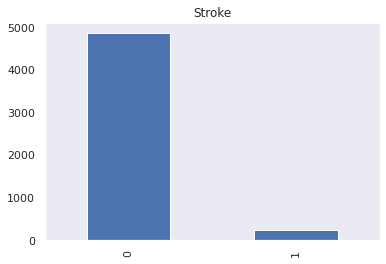

In [23]:
target_count.plot(kind="bar")
plt.title("Stroke")
plt.grid()
plt.show()

``It shows Percentage of stroke[1] 4.87 ``

# Plotting the stroke

# Stroke vs numarical features

<img src='https://media0.giphy.com/media/KVjEHrBiHWkqFB4MUq/giphy.gif'>

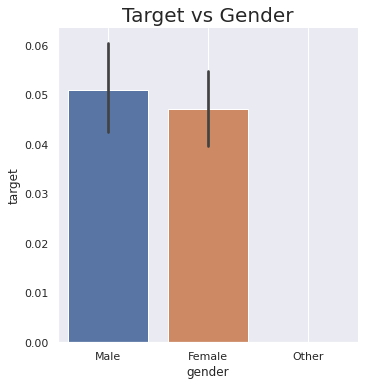

In [24]:
sns.catplot(y='target',x='gender',data=df,kind='bar')
plt.title('Target vs Gender',size=20)
plt.grid()


``Males are more prone to heart attack``

<img src="https://media.tenor.com/images/b46906bbf29dd8a0bf85231ef71998e1/tenor.gif">

``People having more hypertenssion are more prone to stroke``

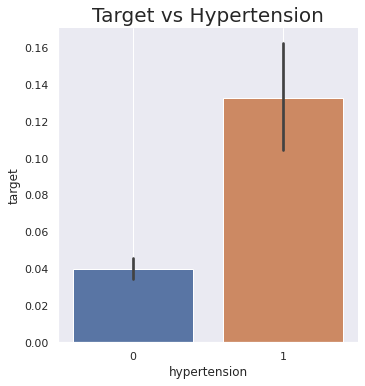

In [25]:
sns.catplot(y='target',x='hypertension',data=df,kind='bar')
plt.title('Target vs Hypertension',size=20)
plt.grid()


<img src='https://www.verywellhealth.com/thmb/XjFwBrJx7bRalsHOyLK2b5aIOcg=/500x350/filters:no_upscale():max_bytes(150000):strip_icc()/heart-health-5-5a78affa04d1cf00377bcdfb.gif'>

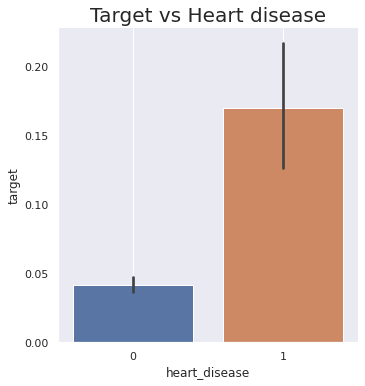

In [26]:
sns.catplot(y='target',x='heart_disease',data=df,kind='bar')
plt.title('Target vs Heart disease',size=20)
plt.grid()


``People with heart disease are more prone to stroke``

<img src='https://c.tenor.com/K6xMm3nxBg4AAAAC/marriage-marry.gif'>

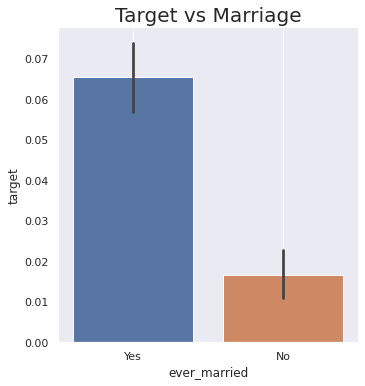

In [27]:
sns.catplot(y='target',x='ever_married',data=df,kind='bar')
plt.title('Target vs Marriage',size=20)
plt.grid()


``Married people are more prone to heart attack``

<img src='https://cdn.dribbble.com/users/3050354/screenshots/14646894/media/1f31948afd5401c44d4bae934f07641a.gif'>

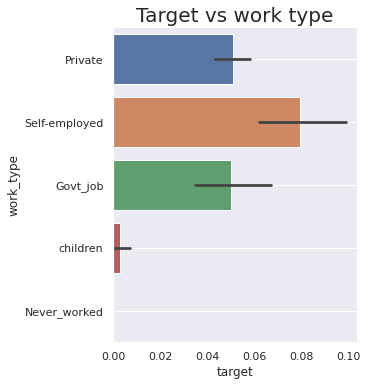

In [28]:
sns.catplot(x='target',y='work_type',data=df,kind='bar')
plt.title('Target vs work type',size=20)
plt.grid()


``Self employed are more prone than any other work type people``

<img src="https://i.gifer.com/8OMe.gif">

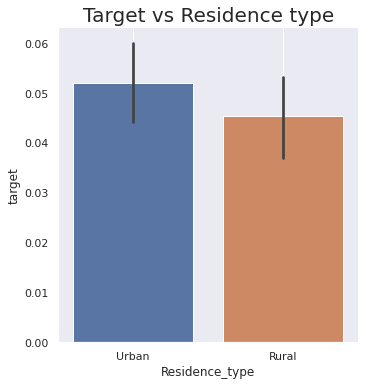

In [29]:
sns.catplot(y='target',x='Residence_type',data=df,kind='bar')
plt.title('Target vs Residence type',size=20)
plt.grid()


``Urban papulation are getting more stroke``

<img src='https://i.pinimg.com/originals/31/3f/09/313f0907a1eff4ffee6ccb427300c59a.gif'>

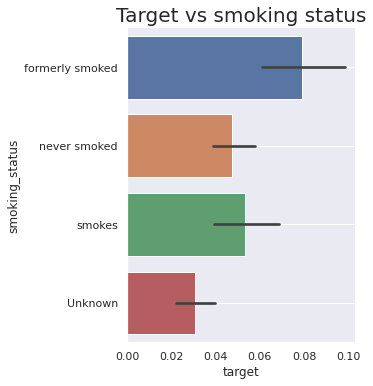

In [30]:
sns.catplot(x='target',y='smoking_status',data=df,kind='bar')
plt.title('Target vs smoking status',size=20)
plt.grid()


``People who are formerly smoking are getting the most strokes``

In [31]:
df["age_bin"]=pd.qcut(df["age"],q=10,precision=1)
df["avg_glucose_level_bin"]=pd.qcut(df["avg_glucose_level"],q=10,precision=1)
df["bmi_bin"]=pd.cut(df["bmi"], [-100,10,20,25,30,35,40,50,100])

In [32]:
#for ever married check cross table
ctab = pd.crosstab(df.ever_married, df.target)
ctab

target,0,1
ever_married,,
No,1728,29
Yes,3133,220


In [33]:
#normalise each row
(ctab.transpose()/ctab.sum(axis=1)).transpose()

target,0,1
ever_married,,
No,0.983495,0.016505
Yes,0.934387,0.065613


# Build Model


In [34]:
#selecting predictors
predictors=features+features_cat
print("No of Predictors",len(predictors))
print(predictors)

No of Predictors 10
['age', 'avg_glucose_level', 'bmi', 'gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


``There are a total of 10 predictors which are used to analyse stroke ``

# BMI

-99.0    201
 28.7     41
 28.4     38
 26.7     37
 26.1     37
        ... 
 48.0      1
 49.4      1
 47.4      1
 46.6      1
 54.0      1
Name: bmi, Length: 419, dtype: int64


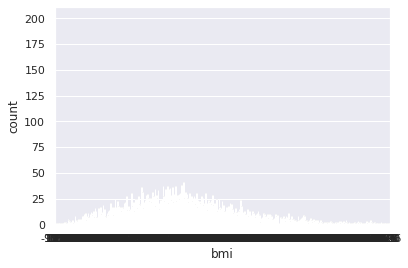

In [35]:
print(df.bmi.value_counts())
sns.set_theme(style="darkgrid")
ax=sns.countplot(data=df,x="bmi",color='black')
plt.show()

# Hypertension

0    4612
1     498
Name: hypertension, dtype: int64


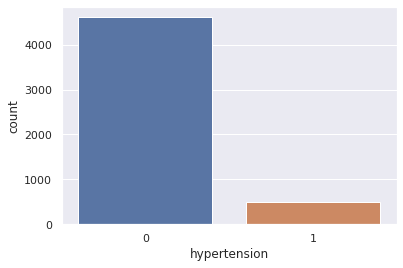

In [36]:
print(df.hypertension.value_counts())
sns.set_theme(style="darkgrid")
ax=sns.countplot(data=df,x="hypertension")
plt.show()

``shows 4612 people have hypertension``

# Marriage status

Yes    3353
No     1757
Name: ever_married, dtype: int64


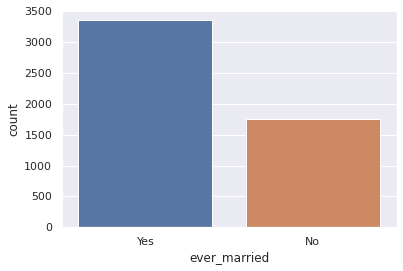

In [37]:
print(df.ever_married.value_counts())
sns.set_theme(style="darkgrid")
ax=sns.countplot(data=df,x="ever_married")
plt.show()

``3353 people are married and 1757 are not married``

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


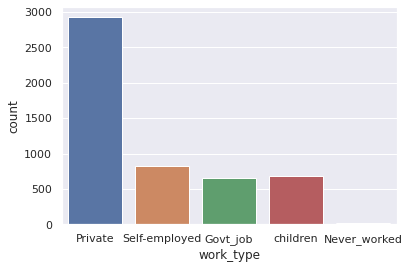

In [38]:
print(df.work_type.value_counts())
sns.set_theme(style="darkgrid")
ax=sns.countplot(data=df,x="work_type")
plt.show()

``Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22``

# Residence type

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


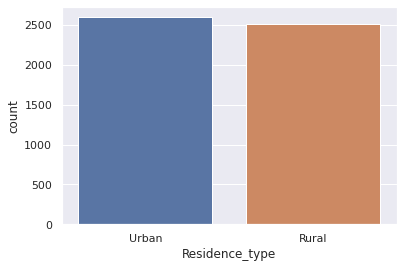

In [39]:
print(df.Residence_type.value_counts())
sns.set_theme(style="darkgrid")
ax=sns.countplot(data=df,x="Residence_type")
plt.show()

``Shows that
Urban    2596
Rural    2514``

# Smoking status

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


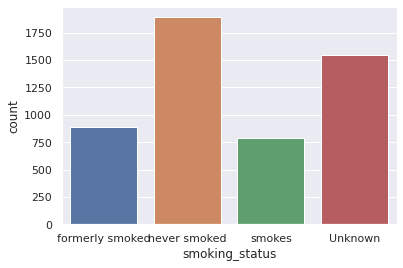

In [40]:
print(df.smoking_status.value_counts())
sns.set_theme(style="darkgrid")
ax=sns.countplot(data=df,x="smoking_status")
plt.show()

``
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789``

# Distribution Plot

**Avg Glucose Level**

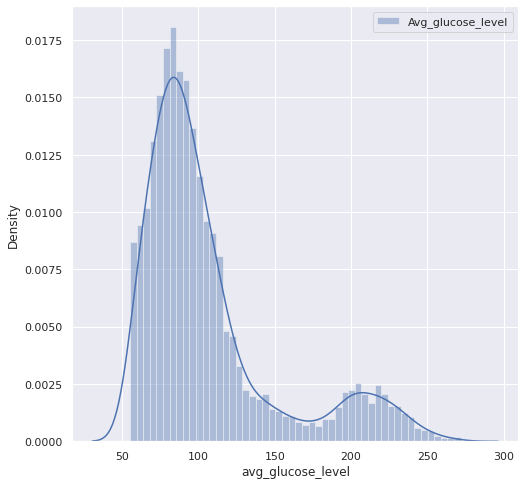

In [41]:
fig=plt.figure(figsize=(8,8))
sns.distplot(df.avg_glucose_level,label="Avg_glucose_level")
plt.legend()

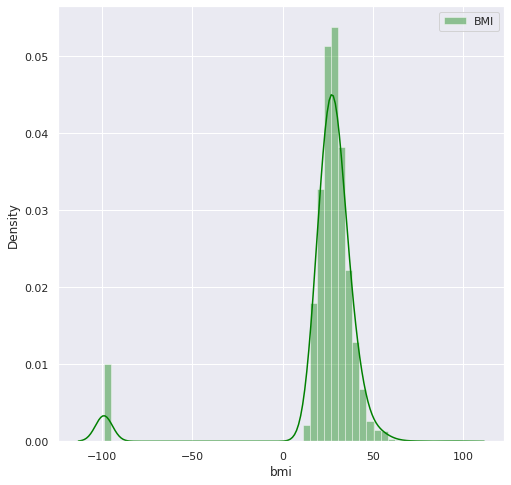

In [42]:
fig=plt.figure(figsize=(8,8))
sns.distplot(df.bmi,label="BMI",color="green")
plt.legend()

In [43]:
df.target

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: target, Length: 5110, dtype: int64

# No target vs target on BMI

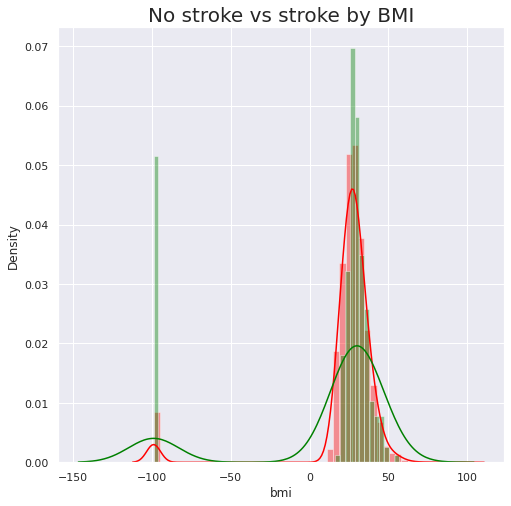

In [44]:
plt.figure(figsize=(8,8))
sns.distplot(df[df["target"]==0]["bmi"],color="red")
sns.distplot(df[df["target"]==1]["bmi"],color="green")
plt.title("No stroke vs stroke by BMI",size=20)
plt.xlim()
plt.show()

`` Shows that people with with bmi around 25 suffered more stroke``

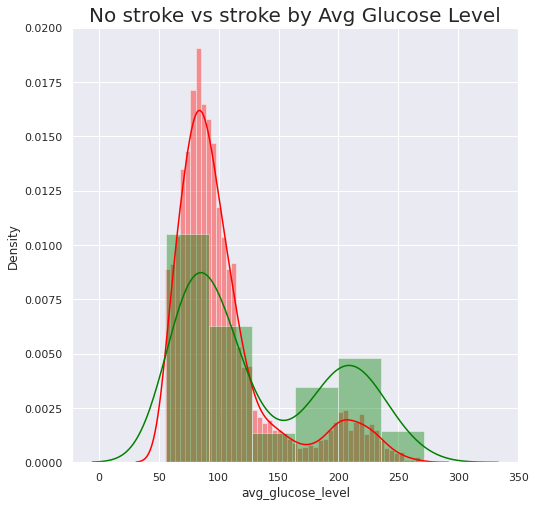

In [45]:
plt.figure(figsize=(8,8))
sns.distplot(df[df["target"]==0]["avg_glucose_level"],color="red")
sns.distplot(df[df["target"]==1]["avg_glucose_level"],color="green")
plt.title("No stroke vs stroke by Avg Glucose Level",size=20)
plt.xlim()
plt.show()

``Shows that people having average glucose level 100 suffer heart stroke the most``

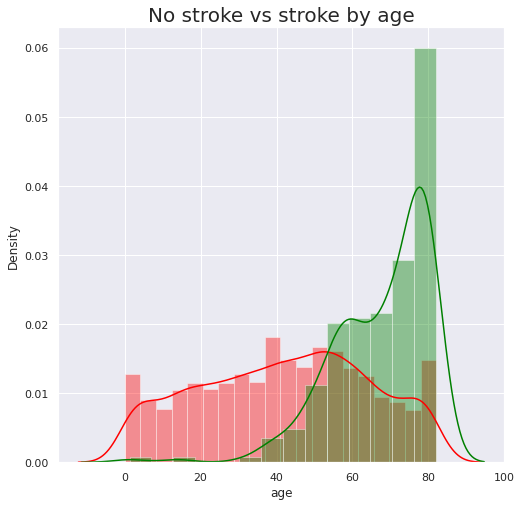

In [46]:
plt.figure(figsize=(8,8))
sns.distplot(df[df["target"]==0]["age"],color="red")
sns.distplot(df[df["target"]==1]["age"],color="green")
plt.title("No stroke vs stroke by age",size=20)
plt.xlim()
plt.show()

``Shows that people with age  more than 50 suffer more heart stroke``

# Scatter plot

**Age VS Bmi**

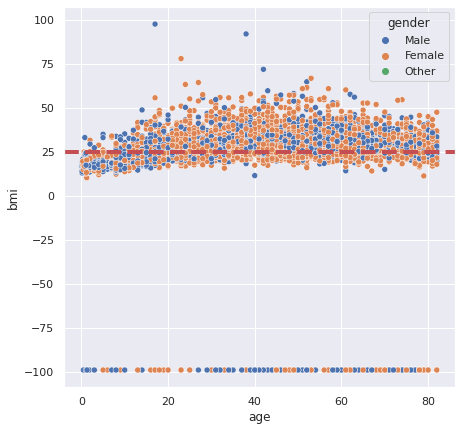

In [47]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=df, x="age", y="bmi", hue='gender')
graph.axhline(y= 25, linewidth=4, color='r', linestyle= '--')
plt.show()

``From the above graph we can see that people with BMI greater than 25 are fat``

# Age vs Average glucose level

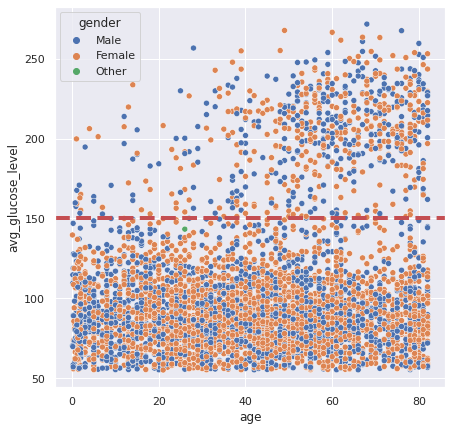

In [48]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=df, x="age", y="avg_glucose_level", hue='gender')
graph.axhline(y= 150, linewidth=4, color='r', linestyle= '--')
plt.show()

``From the above graph we can see that people with glucose greater than 150 are less``


# Voilen Plot

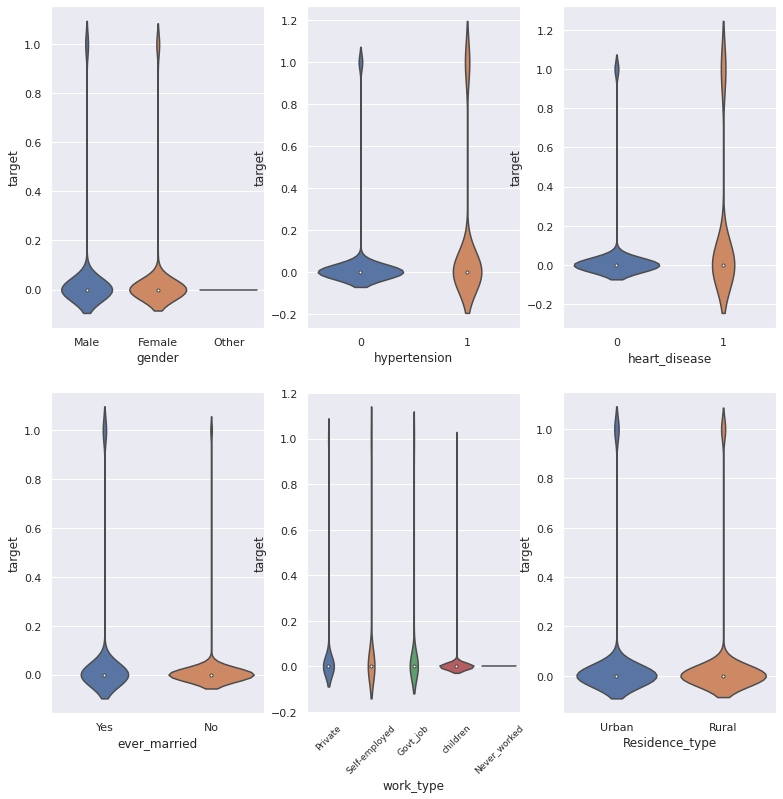

In [49]:
plt.figure(figsize=(13,13))
sns.set_theme(style="darkgrid")
plt.subplot(2,3,1)
sns.violinplot(x = 'gender', y = 'target', data = df)
plt.subplot(2,3,2)
sns.violinplot(x = 'hypertension', y = 'target', data = df)
plt.subplot(2,3,3)
sns.violinplot(x = 'heart_disease', y = 'target', data = df)
plt.subplot(2,3,4)
sns.violinplot(x = 'ever_married', y = 'target', data = df)
plt.subplot(2,3,5)
sns.violinplot(x = 'work_type', y = 'target', data = df)
plt.xticks(fontsize=9, rotation=45)
plt.subplot(2,3,6)
sns.violinplot(x = 'Residence_type', y = 'target', data = df)
plt.show()

# Pair Plot

<Figure size 720x720 with 0 Axes>

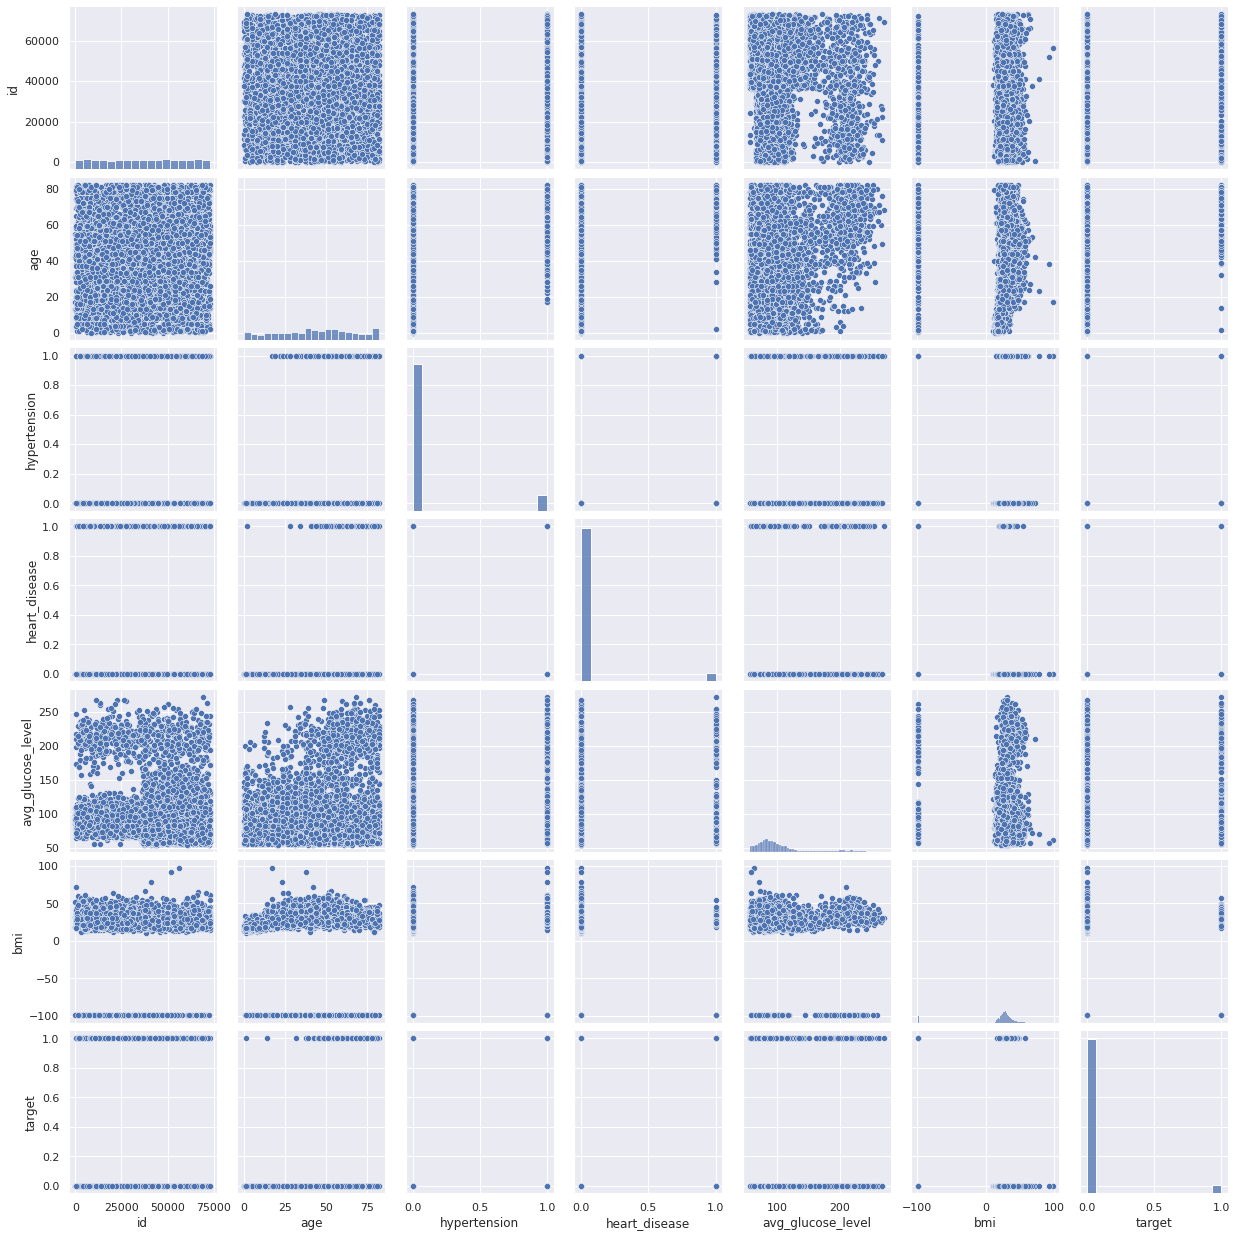

In [50]:
fig=plt.figure(figsize=(10,10))
sns.pairplot(df)
plt.show()

# Data Preprocessing

In [51]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [52]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [53]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [54]:
ohe=OneHotEncoder()

In [55]:
df['gender']=pd.Categorical(df['gender'])
dfdummiesgender=pd.get_dummies(df['gender'],prefix='gender_encoded')
dfdummiesgender

,gender_encoded_Female,gender_encoded_Male,gender_encoded_Other
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
5105,1,0,0
5106,1,0,0
5107,1,0,0
5108,0,1,0


In [56]:
df['smoking_status']=pd.Categorical(df['smoking_status'])
dfdummiessmoke=pd.get_dummies(df['smoking_status'],prefix='gender_encoded')
dfdummiessmoke

,gender_encoded_Unknown,gender_encoded_formerly smoked,gender_encoded_never smoked,gender_encoded_smokes
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0
...,...,...,...,...
5105,0,0,1,0
5106,0,0,1,0
5107,0,0,1,0
5108,0,1,0,0


In [57]:
df['work_type']=pd.Categorical(df['work_type'])
dfdummieswork=pd.get_dummies(df['work_type'],prefix='gender_encoded')
dfdummieswork

,gender_encoded_Govt_job,gender_encoded_Never_worked,gender_encoded_Private,gender_encoded_Self-employed,gender_encoded_children
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,1,0
...,...,...,...,...,...
5105,0,0,1,0,0
5106,0,0,0,1,0
5107,0,0,0,1,0
5108,0,0,1,0,0


In [58]:
df.drop('gender',axis=1,inplace=True)
df.drop('smoking_status',axis=1,inplace=True)
df.drop('work_type',axis=1,inplace=True)

In [59]:
df=pd.concat([df,dfdummiesgender],axis=1)
df=pd.concat([df,dfdummiessmoke],axis=1)
df=pd.concat([df,dfdummieswork],axis=1)
df

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,target,age_bin,...,gender_encoded_Other,gender_encoded_Unknown,gender_encoded_formerly smoked,gender_encoded_never smoked,gender_encoded_smokes,gender_encoded_Govt_job,gender_encoded_Never_worked,gender_encoded_Private,gender_encoded_Self-employed,gender_encoded_children
0,9046,67.0,0,1,Yes,Urban,228.69,36.6,1,"(65.0, 75.0]",...,0,0,1,0,0,0,0,1,0,0
1,51676,61.0,0,0,Yes,Rural,202.21,-99.0,1,"(57.0, 65.0]",...,0,0,0,1,0,0,0,0,1,0
2,31112,80.0,0,1,Yes,Rural,105.92,32.5,1,"(75.0, 82.0]",...,0,0,0,1,0,0,0,1,0,0
3,60182,49.0,0,0,Yes,Urban,171.23,34.4,1,"(45.0, 51.0]",...,0,0,0,0,1,0,0,1,0,0
4,1665,79.0,1,0,Yes,Rural,174.12,24.0,1,"(75.0, 82.0]",...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,Yes,Urban,83.75,-99.0,0,"(75.0, 82.0]",...,0,0,0,1,0,0,0,1,0,0
5106,44873,81.0,0,0,Yes,Urban,125.20,40.0,0,"(75.0, 82.0]",...,0,0,0,1,0,0,0,0,1,0
5107,19723,35.0,0,0,Yes,Rural,82.99,30.6,0,"(30.0, 38.0]",...,0,0,0,1,0,0,0,0,1,0
5108,37544,51.0,0,0,Yes,Rural,166.29,25.6,0,"(45.0, 51.0]",...,0,0,1,0,0,0,0,1,0,0


In [60]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
columns = ['avg_glucose_level','bmi','age']
scaled = std.fit_transform(df[['avg_glucose_level','bmi','age']])
scaled = pd.DataFrame(scaled,columns=columns)
df=df.drop(columns=columns,axis=1)

In [61]:
df=df.merge(scaled, left_index=True, right_index=True, how = "left")
df

,id,hypertension,heart_disease,ever_married,Residence_type,target,age_bin,avg_glucose_level_bin,bmi_bin,gender_encoded_Female,...,gender_encoded_never smoked,gender_encoded_smokes,gender_encoded_Govt_job,gender_encoded_Never_worked,gender_encoded_Private,gender_encoded_Self-employed,gender_encoded_children,avg_glucose_level,bmi,age
0,9046,0,1,Yes,Urban,1,"(65.0, 75.0]","(192.2, 271.7]","(35, 40]",0,...,0,0,0,0,1,0,0,2.706375,0.489421,1.051434
1,51676,0,0,Yes,Rural,1,"(57.0, 65.0]","(192.2, 271.7]","(-100, 10]",1,...,1,0,0,0,0,1,0,2.121559,-4.720861,0.786070
2,31112,0,1,Yes,Rural,1,"(75.0, 82.0]","(98.9, 108.5]","(30, 35]",0,...,1,0,0,0,1,0,0,-0.005028,0.331883,1.626390
3,60182,0,0,Yes,Urban,1,"(45.0, 51.0]","(124.2, 192.2]","(30, 35]",1,...,0,1,0,0,1,0,0,1.437358,0.404888,0.255342
4,1665,1,0,Yes,Rural,1,"(75.0, 82.0]","(124.2, 192.2]","(20, 25]",1,...,1,0,0,0,0,1,0,1.501184,0.005279,1.582163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,0,Yes,Urban,0,"(75.0, 82.0]","(80.0, 85.6]","(-100, 10]",1,...,1,0,0,0,1,0,0,-0.494658,-4.720861,1.626390
5106,44873,0,0,Yes,Urban,0,"(75.0, 82.0]","(124.2, 192.2]","(35, 40]",1,...,1,0,0,0,0,1,0,0.420775,0.620062,1.670617
5107,19723,0,0,Yes,Rural,0,"(30.0, 38.0]","(80.0, 85.6]","(30, 35]",1,...,1,0,0,0,0,1,0,-0.511443,0.258877,-0.363842
5108,37544,0,0,Yes,Rural,0,"(45.0, 51.0]","(124.2, 192.2]","(25, 30]",0,...,0,0,0,0,1,0,0,1.328257,0.066758,0.343796


In [62]:
y = df['target']
x= df.drop(['target'],axis=1)

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=101,test_size=0.2)
print('train data-',len(x_train))
print('test data-',len(x_test))
print('Length of x-',len(x))

train data- 4088
test data- 1022
Length of x- 5110


# Logistic  Regression

# Conclusions

<ul>
<li>From the above graph we can see that people with glucose greater than 150 are less</li>
    <li>From the above graph we can see that people with BMI greater than 25 are fat</li>
    <li>Shows that people with age  more than 50 suffer more heart stroke</li>
    <li>Shows that people with age  more than 50 suffer more heart stroke</li>
<li>People having more hypertenssion are more prone to stroke</li>
    <li>Males are more prone to heart attack</li>

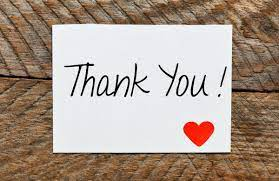